# Tercer parcial - Algorítmica numérica

## Segunda Parte: **Preguntas de desarrollo** - con apuntes, 60min, total 5.75 puntos

## Ejercicio 1 (2 puntos)

**(a) [0.8 puntos]** Las siguientes dos funciones implementan respectivamente la fase de descomposición y la de solución del método LU (Doolittle). Completa los trozos de código que faltan (señalados con ######)

In [54]:
import numpy as np

def LUdecomp(a):
    n = len(a)
    for k in range(0, n-1):
        # print('k ',k)
        for i in range(k+1, n):
            # print('i ',i)
            if a[i, k] != 0.0:
                # print(a[k, i])
                lam = a[i, k] / a[k, k] 
                # print(lam)
                a[i, k] = lam
                a[i, k+1:n] -= lam * a[k, k+1:n]
                
    return a

def LUsolve(a, b):
    n = len(a)
    y = np.zeros_like(b)
    x = np.zeros_like(b)

    #  forward substitution to obtain y
    for k in range(n):
        y[k] = b[k] - np.dot(a[k, :k], y[:k])  # np.dot computes the dot product of two arrays
    
    b[n-1] = b[n-1] / a[n-1, n-1]
    
    #  backward substitution to obtain x
    for k in range(n-1, -1, -1):
        x[k] = (y[k] - np.dot(a[k, k+1:], x[k+1:])) / a[k, k]
        
    return x

In [55]:
def swap_rows(A, i , j):
    '''intercambia la fija j por la i 
    en la matriz de coeficientes A
    de un sistema lienal
    return una nueva matriz A con las filas intercambiadad
    pero con la matriz A original sin modificar'''

    A_copy = np.copy(A)

    ai = np.copy(A[i])
    

    A_copy[i] = A_copy[j]

    A_copy[j] = ai


    return A_copy

In [56]:
a = np.array([[ 3.0, -1.0, 4.0], [-2.0, 0.0, 5.0], [ 7.0, 2.0, -2.0]])
b = np.array([ 6.0, 3.0, 7.0])

In [57]:
a_ampl = np.column_stack((a, b))
a_ampl

array([[ 3., -1.,  4.,  6.],
       [-2.,  0.,  5.,  3.],
       [ 7.,  2., -2.,  7.]])

In [58]:
a_ampl= swap_rows(a_ampl, 1, 2)
a_ampl

array([[ 3., -1.,  4.,  6.],
       [ 7.,  2., -2.,  7.],
       [-2.,  0.,  5.,  3.]])

In [59]:
a = a_ampl[:, :-1]
b = a_ampl[:, -1]
a, b

(array([[ 3., -1.,  4.],
        [ 7.,  2., -2.],
        [-2.,  0.,  5.]]),
 array([6., 7., 3.]))

In [60]:
#Puedes comprobar que funcionan con el siguiente test:
a = LUdecomp(a)
x = LUsolve(a, b)  # x = [ 1. 1. 1.]
x

array([1., 1., 1.])

**(b) [0.8 puntos]** Un ejemplo conocido de matriz mal condicionada es la [matriz de Hilbert](https://en.wikipedia.org/wiki/Hilbert_matrix):

$$
\mathbf{A}=\left[\begin{array}{cccc}
1 & 1 / 2 & 1 / 3 & \cdots \\
1 / 2 & 1 / 3 & 1 / 4 & \cdots \\
1 / 3 & 1 / 4 & 1 / 5 & \cdots \\
\vdots & \vdots & \vdots & \ddots
\end{array}\right]
$$

Escribe una función ```hilbert_sol``` para resolver el sistema de ecuaciones $\mathbf{Ax} = \mathbf{b}$ por el método de descomposición LU de Doolittle, donde $\mathbf{A}$ es la matriz de Hilbert de tamaño arbitrario $n \times n$, y

$$
b_i=\sum_{j=1}^n A_{i j}
$$

El único parámetro de entrada de dicha función debe ser $n$. Utiliza los métodos del apartado anterior.

In [63]:
n = 4
H = np.ones((n,n))
b = np.zeros(n)
b[2] = sum(H[2])
H, b

(array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 array([0., 0., 4., 0.]))

In [89]:
def hilbert_sol(n: int, func1 = LUdecomp, func2= LUsolve):

    H = np.zeros((n,n))
    b = np.zeros((n))

    for i in range(n):
        for j in range(n):
            H[i,j] = 1 / (i + j + 1)

            b[i] = sum(H[i])

    LU = func1(H.copy())
    x = func2(LU, b.copy())

    
    return x

In [86]:
hilbert_sol(4)

array([1., 1., 1., 1.])

**(c) [0.4 puntos]** Experimenta con la función anterior para determinar el mayor $n$ para el que la solución tiene un error relativo máximo menor de $1 \cdot 10^{-6}$, sabiendo que la solución exacta es:
$$
\mathbf{x}=\left[\begin{array}{llll}
1 & 1 & 1 & \cdots
\end{array}\right]^T
$$

In [91]:
# gpt pendiende de checkeo 

def error_relativo(x_aprox, x_exacta):
    return np.max(np.abs(x_aprox - x_exacta)) / np.max(np.abs(x_exacta))

def encontrar_n_maximo(func1 = LUdecomp, func2= LUsolve, tol=1e-6):
    n = 1  # Empezamos con n=1
    while True:
        # Solución exacta
        x_exacta = np.ones(n)
        
        # Obtener la solución aproximada
        x_aprox = hilbert_sol(n)
        
        # Calcular el error relativo
        error = error_relativo(x_aprox, x_exacta)
        
        # Verificar la tolerancia
        if error > tol:
            break  # Terminar si el error excede la tolerancia
        
        n += 1  # Incrementar n
    
    return n - 1  # Último n válido

# Ejecutar la función
n_max = encontrar_n_maximo(LUdecomp, LUsolve)
print(f"El mayor valor de n con error relativo menor que 1e-6 es: {n_max}")


El mayor valor de n con error relativo menor que 1e-6 es: 8


## Ejercicio 2 (2.25 puntos)

Programa una función ```safe_newton_raphson``` que implemente una versión "segura" del algoritmo de Newton-Raphson, tal y como se indica a continuación. Se asume que la raíz a calcular está inicialmente acotada en $(a, b)$. La función tiene signos opuestos en los extremos de este intervalo. El punto medio del intervalo $(a, b)$ se utiliza como estimación inicial de la raíz, a partir de la cual se comienza a aplicar al algoritmo de Newton-Raphson. Las cotas se deben actualizan después de cada iteración. Si en una iteración del algoritmo de Newton-Raphson el nuevo valor de la estimación de la raíz no se mantiene dentro de las cotas que haya en ese momento, esa iteración se descarta y se sustituye por la bisección. 

El método necesitará los siguientes parámetros:
 - ```f```: la función sobre la que se desea hacer la búsqueda de la raíz.
 - ```df```: la derivada de la función anterior
 - ```a```: el límite inferior inicial del intervalo que acota la solución
 - ```b```: el límite superior inicial del intervalo que acota la solución
 - ```tol```: la tolerancia objetivo
 - ```n_max```: el número máximo de iteraciones
 - ```switch```: una variable booleana seteada por defecto en ```False```. Cuando el usuario la fije en ```True```, debe activar un mecanismo que compruebe que la solución está convergiendo, devolviendo un ```None``` e informando al usuario en caso contrario.

In [92]:
from typing import Callable
import numpy

In [ ]:
def newton_raphson(f: Callable, prime: Callable, x, tol= 1e-10, max_iter = 100):

    for i in range(max_iter):

        fx = f(x)
        dx = prime(x)

        x_old = x
        x -= fx / dx

        if abs(x - x_old) < tol:
            print(f'encontrada la raiz en {i} iteraciones')
            return x
        
    return (f'no se ha encontrado la raiz en {max_iter} iteraciones')

In [96]:
def safe_newton_raphson(f: Callable, prime: Callable, a: float, b: float, tol= 1e-10, n_max= 100, switch=False):

    fa  = f(a)
    fb = f(b)

    if fa * fb > 0:
        raise ValueError('los extremos del intervalo tienen el mismo signo')

    c = (a + b) / 2
    for i in range(n_max):

        fc = f(c)
        dc = prime(c)

        if dc == 0:
            raise ValueError('f la derivada de c {dc} vale 0')

        else:
            c_old = c
            c -= fc / dc

        if not (a <= c <= b):
                raise ValueError("Newton-Raphson fuera de límites")
        
        if switch and abs(f(c)) > abs(fc):
                print("La solución no está convergiendo. Abortando.")
                return None
        
        if abs(c - c_old) < tol:
            print(f"Raíz encontrada en {i + 1} iteraciones.")
            return c
        
        # Actualizar los límites del intervalo
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        # if abs(c - c_old) < tol:
        #     print(f'encontrada la raiz en {i} iteraciones')
        #     return c
        
        # else:
        #     if fa * fc < 0:
        #         b = c

        #     else:
        #         a = c

    return (f'no se ha encontrado la raiz en {n_max} iteraciones')



In [97]:
def f(x):
    return x**3 - x - 2

def df(x):
    return 3*x**2 - 1

# Parámetros
a, b = 1, 2
tol = 1e-6
n_max = 50
switch = True

# Llamar a la función
raiz = safe_newton_raphson(f, df, a, b, tol, n_max, switch)
print(f"La raíz aproximada es: {raiz}")

Raíz encontrada en 3 iteraciones.
La raíz aproximada es: 1.5213797068045751


## Ejercicio 3 (1.5 puntos)

La relación entre la resistencia aerodinámica de un ala $r$ y el ancho del ala $h$ viene dada por la siguiente expresión:

$$
\int_0^h r(t) dt = a + b \cdot r
$$

donde $a$ y $b$ son constantes a determinar, y la variable $\int_0^h r(t) dt$ se llama "resistencia unitaria". La siguiente tabla muestra los resultados de un ensayo en túnel aerodinámico con distintos anchos de ala:

<center>

| $h$ | $r$ |
|---------|-------|
| 0 | 0 | 
| 0.10 | 3.031 | 
| 0.20 | 4.184 | 
| 0.30 | 4.975 | 
| 0.40 | 5.943 | 
| 0.50 | 6.115 |
| 0.60 | 7.315 |
| 0.70 | 7.325 |
</center>

Dichos resultados corresponden con los almacenados en las siguientes dos listas:

In [98]:
h = [0.0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70]
r = [0.0, 3.031, 4.184, 4.975, 5.943, 6.115, 7.315, 7.325]

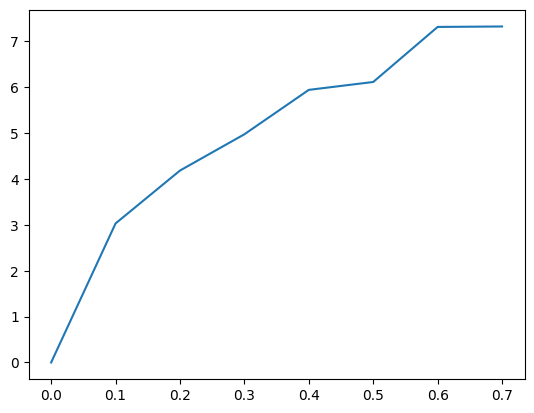

In [99]:
import matplotlib.pyplot as plt

plt.plot(h, r)
plt.show()

In [104]:
from scipy import stats
sol = stats.linregress(r, h)
a = sol.intercept
b = sol.slope
a, b

(np.float64(-0.10669229472935826), np.float64(0.09395027663636253))

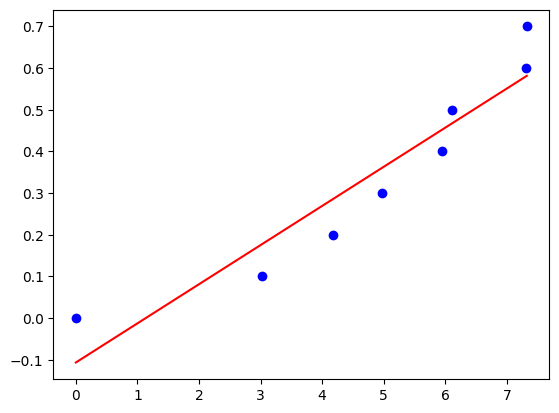

In [105]:
plt.scatter(r, h, label="Datos", color="blue")
plt.plot(r, [b * x + a for x in r], label="Línea de regresión", color="red")
plt.show()

In [101]:
from typing import List

def regression_manual(x: List[float], y: List[float]):
    """
    Calcula la pendiente y el intercepto de una regresión lineal usando magnitudes auxiliares.

    Args:
        x (List[float]): Lista de valores independientes.
        y (List[float]): Lista de valores dependientes.

    Returns:
        float, float: Pendiente (b) e intercepto (a).
    """
    n = len(x)
    mean_x = sum(x) / n  # Media de x
    mean_y = sum(y) / n  # Media de y

    # Calcular las magnitudes auxiliares
    cov_xy = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    var_x = sum((x[i] - mean_x) ** 2 for i in range(n))

    # Calcular pendiente (b) e intercepto (a)
    b = cov_xy / var_x
    a = mean_y - b * mean_x

    return b, a

# Datos proporcionados
r = [0.0, 3.031, 4.184, 4.975, 5.943, 6.115, 7.315, 7.325]
h = [0.0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70]

# Calcular regresión manual
b, a = regression_manual(r, h)
print(f"Pendiente (b): {b:.5f}")
print(f"Intercepto (a): {a:.5f}")


Pendiente (b): 0.09395
Intercepto (a): -0.10669


Determina los parámetros $a$ y $b$ por regresión lineal. Si necesitases calcular alguna magnitud auxiliar, utiliza el método numérico que consideres oportuno (libre).

Nota: el módulo ```scipy.stats``` dispone del método ```linregress``` que facilita el cálculo de la recta de regresión. Observa el siguiente ejemplo trivial:

In [95]:
from scipy import stats

x = [0, 1, 2, 3]
y = [1, 4, 2, 3]

# En esta instancia se almacenan varios estadísticos útiles relacionados con la regresión. 
res = stats.linregress(x, y)

# En particular en 'res.slope' y en 'res.intercept' se tiene la pendiente y el término independiente de la recta
print(f"La pendiente de la recta de regresión de ejemplo es {res.slope}")
print(f"El término independiente de la recta de regresión de ejemplo es {res.intercept}")

La pendiente de la recta de regresión de ejemplo es 0.4
El término independiente de la recta de regresión de ejemplo es 1.9
